In [2]:
# Retail Sales Trend Analysis

## Import Libraries
# Import the necessary libraries for data manipulation and visualization.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset
# Load your retail sales data (replace 'sales_data.csv' with your actual file name).
# Ensure that 'date' column is parsed as datetime for accurate time-based analysis.
df = pd.read_csv('sales_data.csv', parse_dates=['date'])

# Display the first few rows to understand the data structure.
df.head()


ModuleNotFoundError: No module named 'seaborn'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Generate random dates between 2023-01-01 and 2023-04-08
dates = pd.date_range(start='2023-01-01', end='2023-04-08')
dates = np.random.choice(dates, size=1000)

# Generate random products from a list
products = ['Product A', 'Product B', 'Product C']
products = np.random.choice(products, size=1000)

# Generate random sales amounts
sales = np.random.randint(50, 300, size=1000)

# Generate random regions
regions = ['East', 'West', 'North', 'South']
regions = np.random.choice(regions, size=1000)

# Create a DataFrame
df = pd.DataFrame({'date': dates, 'product': products, 'sales': sales, 'region': regions})


In [8]:
df.head()

,date,product,sales,region
0,2023-03-18,Product A,257,South
1,2023-01-27,Product C,200,East
2,2023-03-20,Product A,216,North
3,2023-01-16,Product A,223,West
4,2023-01-27,Product A,78,East


** Data Cleaning**

In [9]:


# Check for any missing values.
print("Missing values:\n", df.isnull().sum())

# Fill or drop missing values based on context (example: drop rows with missing data).
df.dropna(inplace=True)

# Check data types to ensure they are suitable for analysis.
print("Data types:\n", df.dtypes)

# Convert date to datetime if not already done (important for time-based analysis).
df['date'] = pd.to_datetime(df['date'])

# Verify cleaning steps.
df.info()


Missing values:
 date       0
product    0
sales      0
region     0
dtype: int64
Data types:
 date       datetime64[ns]
product            object
sales               int32
region             object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1000 non-null   datetime64[ns]
 1   product  1000 non-null   object        
 2   sales    1000 non-null   int32         
 3   region   1000 non-null   object        
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 27.5+ KB


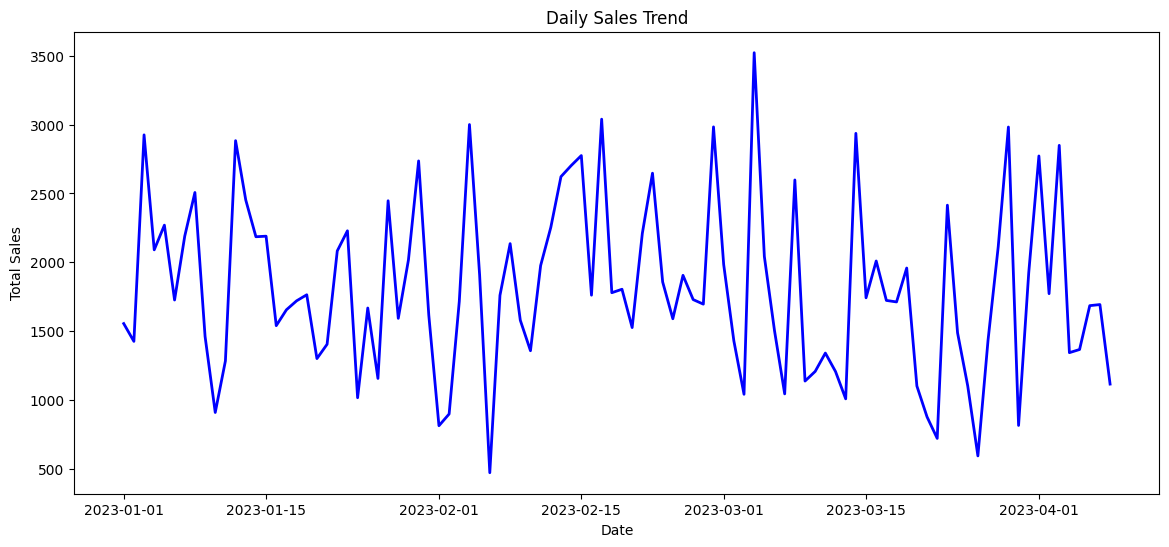

In [10]:
## Exploratory Data Analysis (EDA)

### 1. Overall Sales Trends

# Aggregate sales data by date.
daily_sales = df.groupby('date')['sales'].sum()

# Plot the overall sales trend.
plt.figure(figsize=(14, 6))
plt.plot(daily_sales.index, daily_sales.values, color='b', linewidth=2)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


C:\Users\Mohamed.Fawzy\AppData\Local\Temp\ipykernel_25148\4267029089.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.head(10).values, y=product_sales.head(10).index, palette="viridis")


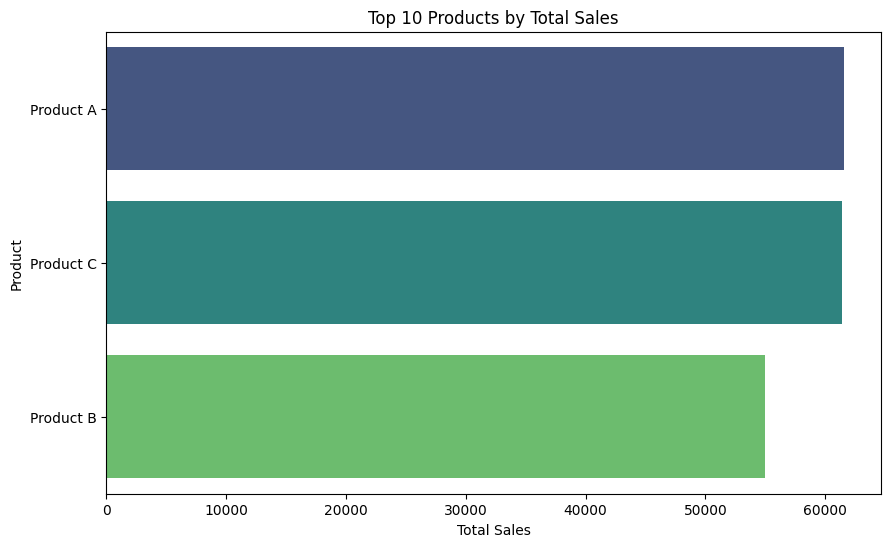

In [11]:
### 2. Sales by Product

# Group data by product to see total sales per product.
product_sales = df.groupby('product')['sales'].sum().sort_values(ascending=False)

# Plot the top 10 products by total sales.
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.head(10).values, y=product_sales.head(10).index, palette="viridis")
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.show()


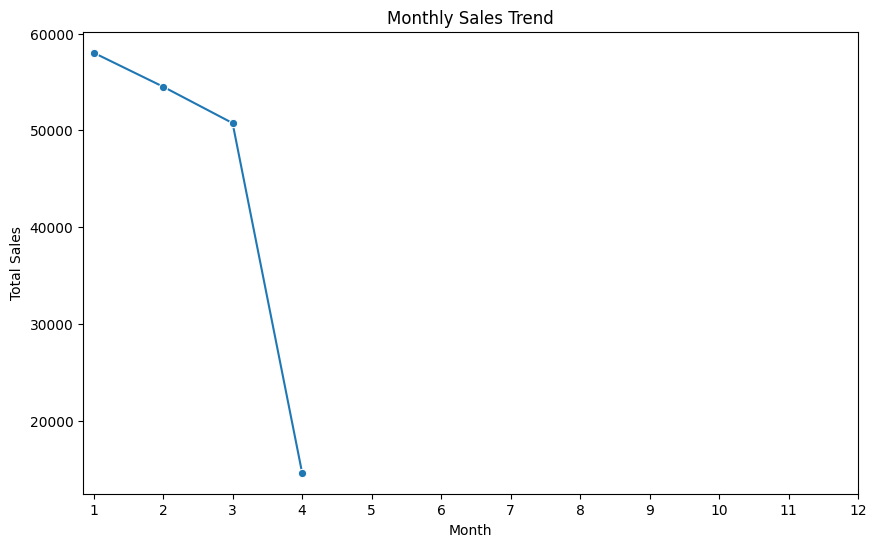

C:\Users\Mohamed.Fawzy\AppData\Local\Temp\ipykernel_25148\470056788.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="coolwarm")


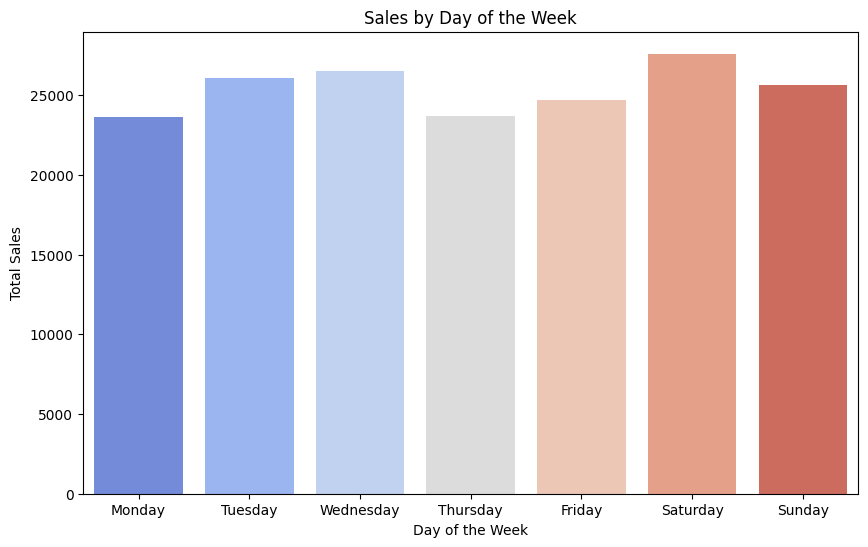

In [12]:
### 3. Seasonal Sales Trends

# Extract month and day of the week to analyze seasonal patterns.
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()

# Monthly sales trend
monthly_sales = df.groupby('month')['sales'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1, 13))
plt.show()

# Sales by day of the week
weekday_sales = df.groupby('day_of_week')['sales'].sum()
weekday_sales = weekday_sales.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="coolwarm")
plt.title("Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.show()


C:\Users\Mohamed.Fawzy\AppData\Local\Temp\ipykernel_25148\1950027891.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="magma")


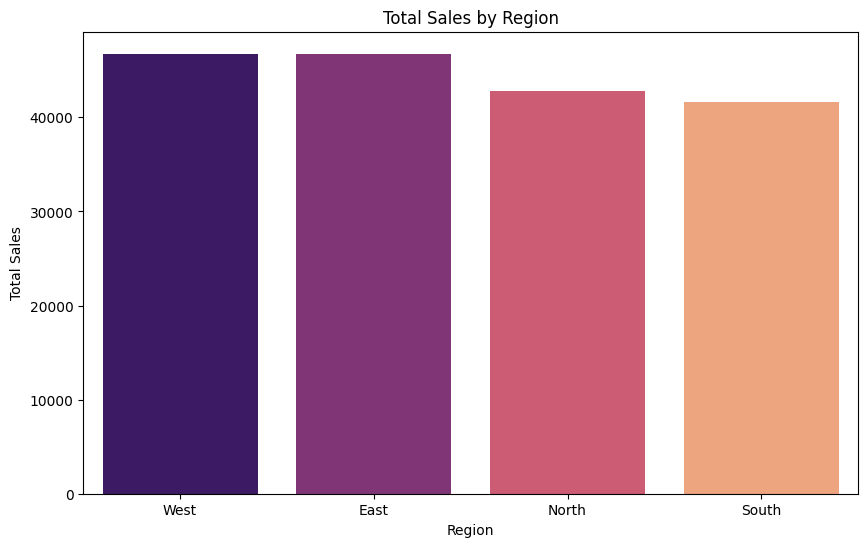

In [13]:
### 4. Sales by Region

# Group by region to see which regions have the highest sales.
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="magma")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()
